In [2]:
import datetime
from jdcal import jd2gcal
from matplotlib import gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import xarray as xr

In [3]:
input_filename = 'Resources/FPA_FOD_20170508.sqlite'
conn = sqlite3.connect(input_filename)
query = '''
    SELECT
        NWCG_REPORTING_AGENCY, NWCG_REPORTING_UNIT_ID,
        NWCG_REPORTING_UNIT_NAME,
        FIRE_NAME,
        COMPLEX_NAME,
        FIRE_YEAR,
        DISCOVERY_DATE,
        DISCOVERY_DOY,
        DISCOVERY_TIME,
        STAT_CAUSE_CODE,
        STAT_CAUSE_DESCR,
        CONT_DATE,
        CONT_DOY,
        CONT_TIME,
        FIRE_SIZE,
        FIRE_SIZE_CLASS,
        LATITUDE,
        LONGITUDE,
        OWNER_CODE,
        OWNER_DESCR,
        STATE,
        COUNTY
    FROM
        Fires;
'''
df_raw = pd.read_sql_query(query, conn)
df_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 22 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   NWCG_REPORTING_AGENCY     object 
 1   NWCG_REPORTING_UNIT_ID    object 
 2   NWCG_REPORTING_UNIT_NAME  object 
 3   FIRE_NAME                 object 
 4   COMPLEX_NAME              object 
 5   FIRE_YEAR                 int64  
 6   DISCOVERY_DATE            float64
 7   DISCOVERY_DOY             int64  
 8   DISCOVERY_TIME            object 
 9   STAT_CAUSE_CODE           float64
 10  STAT_CAUSE_DESCR          object 
 11  CONT_DATE                 float64
 12  CONT_DOY                  float64
 13  CONT_TIME                 object 
 14  FIRE_SIZE                 float64
 15  FIRE_SIZE_CLASS           object 
 16  LATITUDE                  float64
 17  LONGITUDE                 float64
 18  OWNER_CODE                float64
 19  OWNER_DESCR               object 
 20  STATE                   

In [4]:
drop_columns = ['NWCG_REPORTING_AGENCY',
                'NWCG_REPORTING_UNIT_ID',
                'NWCG_REPORTING_UNIT_NAME',
                'FIRE_NAME',
                'COMPLEX_NAME', 
                'OWNER_DESCR',
                'FIRE_SIZE_CLASS',
                'OWNER_CODE']
df_CA = df_raw[df_raw.STATE == 'CA'].drop(columns=drop_columns)
#Extracting onset month and day
df_CA['MONTH'] = df_CA['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[1])
df_CA['DAY'] = df_CA['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[2])

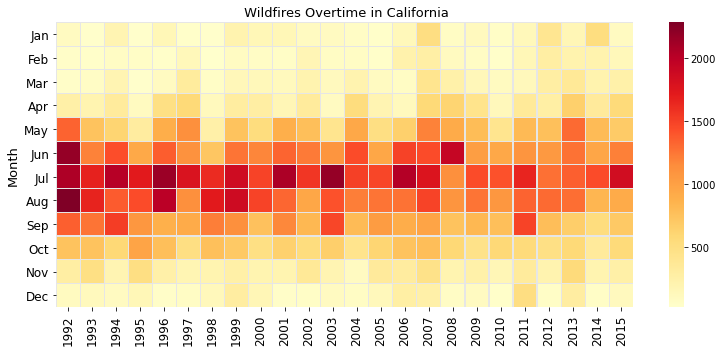

In [5]:
df_freq_mon = df_CA.groupby(['MONTH', 'FIRE_YEAR']).size().unstack()
# plot monthly frequency of fire events
counter_fig = 'California'
mon_ticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=[11,5])
sns.heatmap(df_freq_mon, cmap='YlOrRd', linewidth=.2, linecolor=[.9,.9,.9])
plt.yticks(np.arange(0.5,12.5), labels=mon_ticks, rotation=0, fontsize=12)
plt.xticks(fontsize=12);
plt.xlabel('')
plt.ylabel('Month', fontsize=13)
plt.title(f' Wildfires Overtime in California', fontsize=13)
plt.tight_layout()
plt.savefig(f'static/Images/{counter_fig}.png', format='png', dpi=200)

In [ ]:
df_AK = df_raw[df_raw.STATE == 'AK'].drop(columns=drop_columns)
#Extracting onset month and day
df_AK['MONTH'] = df_AK['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[1])
df_AK['DAY'] = df_AK['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[2])
df_freq_mon = df_AK.groupby(['MONTH', 'FIRE_YEAR']).size().unstack()
# plot monthly frequency of fire events
counter_fig = 'Alaska'
mon_ticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=[11,5])
sns.heatmap(df_freq_mon, cmap='YlOrRd', linewidth=.2, linecolor=[.9,.9,.9])
plt.yticks(np.arange(0.5,12.5), labels=mon_ticks, rotation=0, fontsize=12)
plt.xticks(fontsize=12);
plt.xlabel('')
plt.ylabel('Month', fontsize=13)
plt.title(f' Wildfires Overtime in Alaksa', fontsize=13)
plt.tight_layout()
plt.savefig(f'static/Images/{counter_fig}.png', format='png', dpi=200)

In [ ]:
df_GA = df_raw[df_raw.STATE == 'GA'].drop(columns=drop_columns)
#Extracting onset month and day
df_GA['MONTH'] = df_GA['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[1])
df_GA['DAY'] = df_GA['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[2])
df_freq_mon = df_GA.groupby(['MONTH', 'FIRE_YEAR']).size().unstack()
# plot monthly frequency of fire events
counter_fig = 'Georgia'
mon_ticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=[11,5])
sns.heatmap(df_freq_mon, cmap='YlOrRd', linewidth=.2, linecolor=[.9,.9,.9])
plt.yticks(np.arange(0.5,12.5), labels=mon_ticks, rotation=0, fontsize=12)
plt.xticks(fontsize=12);
plt.xlabel('')
plt.ylabel('Month', fontsize=13)
plt.title(f' Wildfires Overtime in Georgia', fontsize=13)
plt.tight_layout()
plt.savefig(f'static/Images/{counter_fig}.png', format='png', dpi=200)

In [ ]:
df_TX = df_raw[df_raw.STATE == 'TX'].drop(columns=drop_columns)
#Extracting onset month and day
df_TX['MONTH'] = df_TX['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[1])
df_TX['DAY'] = df_TX['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[2])
df_freq_mon = df_TX.groupby(['MONTH', 'FIRE_YEAR']).size().unstack()
# plot monthly frequency of fire events
counter_fig = 'Texas'
mon_ticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=[11,5])
sns.heatmap(df_freq_mon, cmap='YlOrRd', linewidth=.2, linecolor=[.9,.9,.9])
plt.yticks(np.arange(0.5,12.5), labels=mon_ticks, rotation=0, fontsize=12)
plt.xticks(fontsize=12);
plt.xlabel('')
plt.ylabel('Month', fontsize=13)
plt.title(f' Wildfires Overtime in Texas', fontsize=13)
plt.tight_layout()
plt.savefig(f'static/Images/{counter_fig}.png', format='png', dpi=200)

In [ ]:
df_NC = df_raw[df_raw.STATE == 'NC'].drop(columns=drop_columns)
#Extracting onset month and day
df_NC['MONTH'] = df_NC['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[1])
df_NC['DAY'] = df_NC['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[2])
df_freq_mon = df_NC.groupby(['MONTH', 'FIRE_YEAR']).size().unstack()
# plot monthly frequency of fire events
counter_fig = 'North Carolina'
mon_ticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=[11,5])
sns.heatmap(df_freq_mon, cmap='YlOrRd', linewidth=.2, linecolor=[.9,.9,.9])
plt.yticks(np.arange(0.5,12.5), labels=mon_ticks, rotation=0, fontsize=12)
plt.xticks(fontsize=12);
plt.xlabel('')
plt.ylabel('Month', fontsize=13)
plt.title(f' Wildfires Overtime in North Carolina', fontsize=13)
plt.tight_layout()
plt.savefig(f'static/Images/{counter_fig}.png', format='png', dpi=200)

In [ ]:
df_FL = df_raw[df_raw.STATE == 'FL'].drop(columns=drop_columns)
#Extracting onset month and day
df_FL['MONTH'] = df_FL['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[1])
df_FL['DAY'] = df_FL['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[2])
df_freq_mon = df_FL.groupby(['MONTH', 'FIRE_YEAR']).size().unstack()
# plot monthly frequency of fire events
counter_fig = 'Florida'
mon_ticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=[11,5])
sns.heatmap(df_freq_mon, cmap='YlOrRd', linewidth=.2, linecolor=[.9,.9,.9])
plt.yticks(np.arange(0.5,12.5), labels=mon_ticks, rotation=0, fontsize=12)
plt.xticks(fontsize=12);
plt.xlabel('')
plt.ylabel('Month', fontsize=13)
plt.title(f' Wildfires Overtime in Florida', fontsize=13)
plt.tight_layout()
plt.savefig(f'static/Images/{counter_fig}.png', format='png', dpi=200)

In [ ]:
df_IL = df_raw[df_raw.STATE == 'IL'].drop(columns=drop_columns)
#Extracting onset month and day
df_IL['MONTH'] = df_IL['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[1])
df_IL['DAY'] = df_IL['DISCOVERY_DATE'].apply(lambda x: jd2gcal(x, 0)[2])
df_freq_mon = df_IL.groupby(['MONTH', 'FIRE_YEAR']).size().unstack()
# plot monthly frequency of fire events
counter_fig = 'Illinois'
mon_ticks = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=[11,5])
sns.heatmap(df_freq_mon, cmap='YlOrRd', linewidth=.2, linecolor=[.9,.9,.9])
plt.yticks(np.arange(0.5,12.5), labels=mon_ticks, rotation=0, fontsize=12)
plt.xticks(fontsize=12);
plt.xlabel('')
plt.ylabel('Month', fontsize=13)
plt.title(f' Wildfires Overtime in Illinois', fontsize=13)
plt.tight_layout()
plt.savefig(f'static/Images/{counter_fig}.png', format='png', dpi=200)